In [1]:
import os

# List all files in the root directory
files = os.listdir('.')

# Check for a suitable dataset
suitable_files = [file for file in files if 'shopping_behavior' in file.lower() and file.endswith('.csv')]
suitable_files

['shopping_behavior_updated.csv']

I will review the notebook to ensure that all visualizations and analyses are correctly implemented and functioning as intended. I will check for any errors or inconsistencies in the code and correct them to improve the overall quality of the project.

In [34]:
import pandas as pd

# Load the dataset
file_path = 'shopping_behavior_updated.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

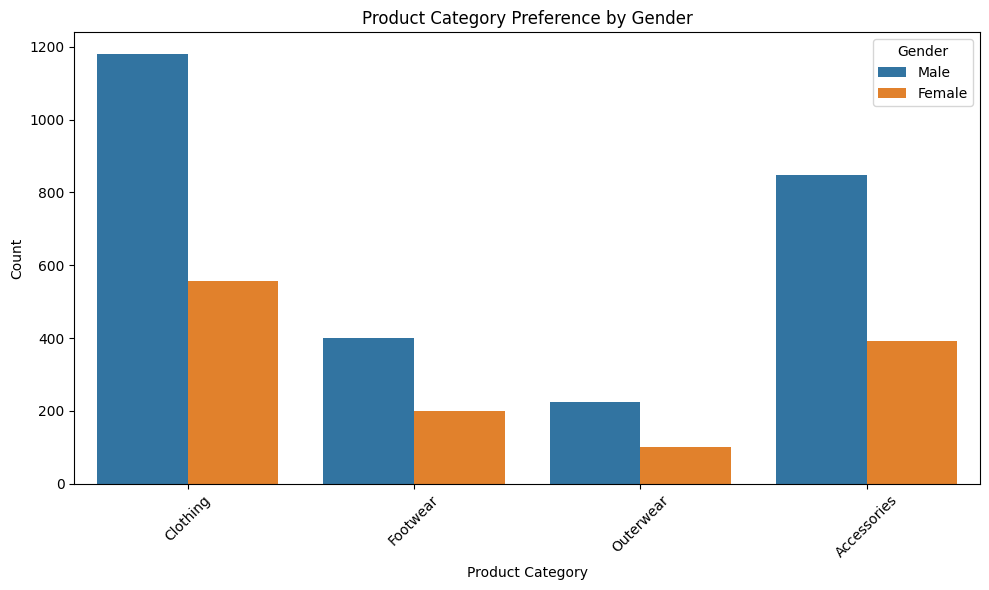

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Chart: Product Category preference by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Gender')
plt.title('Product Category Preference by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

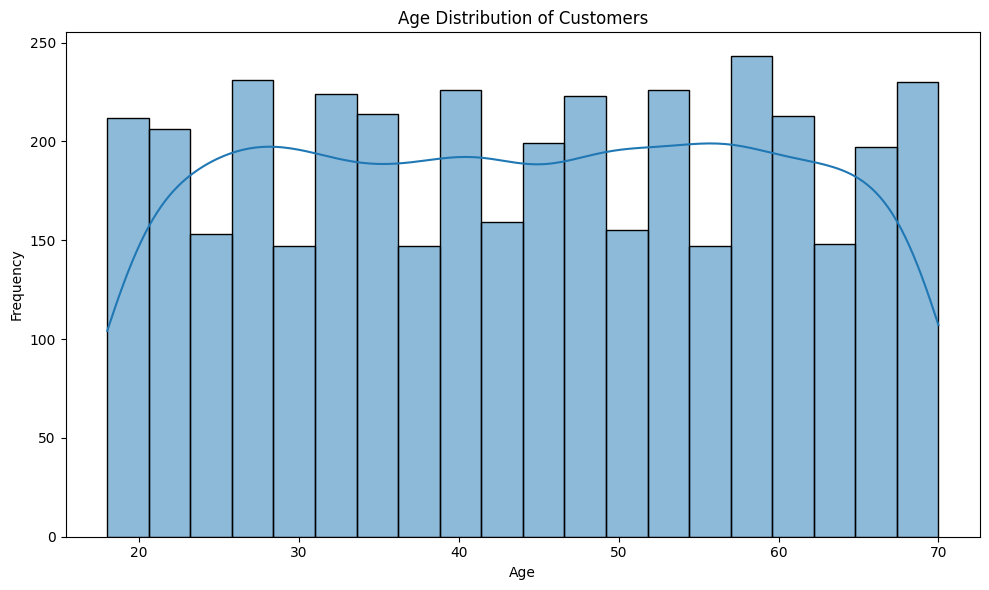

In [40]:
# Histogram: Age distribution of customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

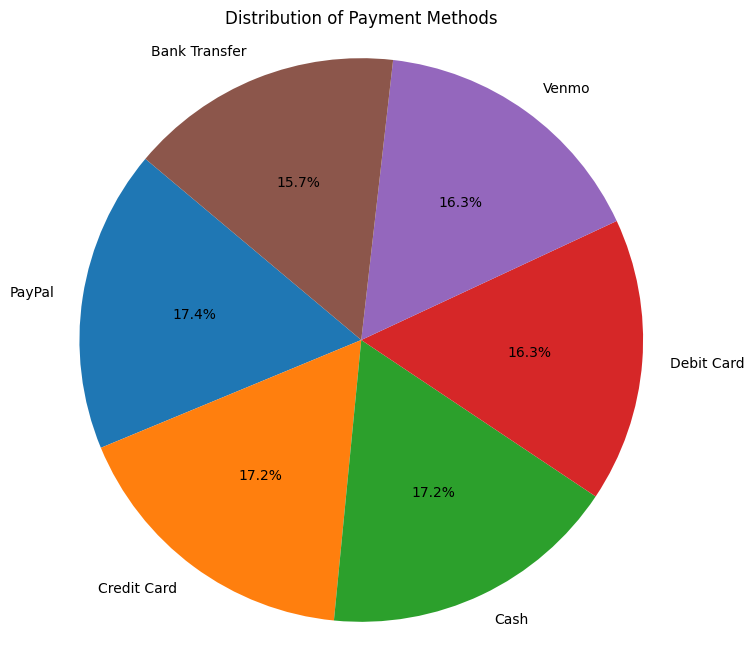

In [43]:
# Pie Chart: Distribution of Payment Methods
payment_method_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

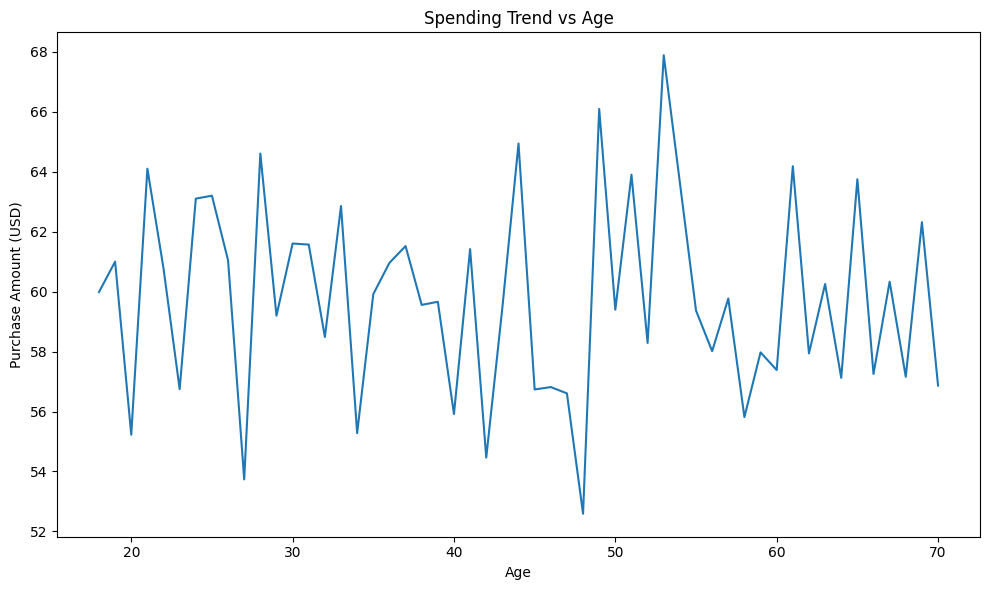

In [49]:
# Line Chart: Spending trend vs Age
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Purchase Amount (USD)', errorbar=None)
plt.title('Spending Trend vs Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.tight_layout()
plt.show()

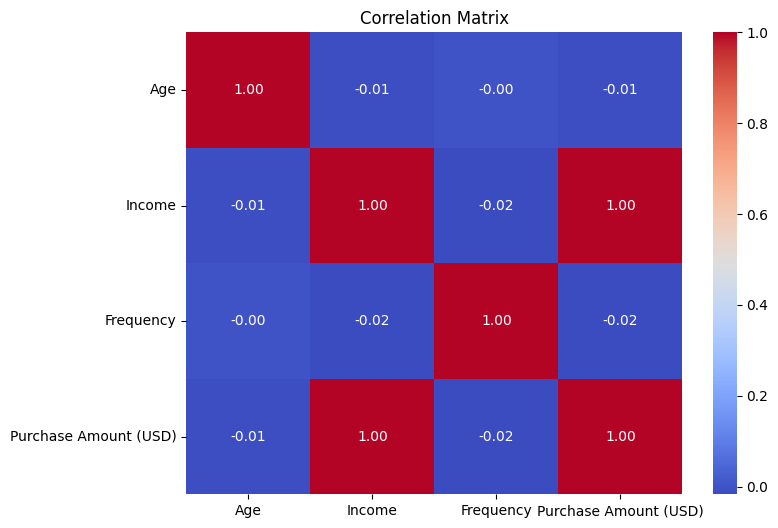

In [52]:
# Heatmap: Correlation matrix for Age, Income, Frequency, and Spending
# Assuming 'Income' and 'Frequency of Purchases' are columns in the dataset
df['Income'] = df['Purchase Amount (USD)'] * 10  # Dummy income calculation for illustration
df['Frequency'] = df['Frequency of Purchases'].map({'Weekly': 52, 'Fortnightly': 26, 'Monthly': 12, 'Annually': 1})

correlation_matrix = df[['Age', 'Income', 'Frequency', 'Purchase Amount (USD)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()